<a href="https://colab.research.google.com/github/FauziahGusriYasinta/praktikum-pertemuan-2/blob/main/UAS_PDDM_4932.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Data Preprocessing

Dataset yang digunakan adalah Time Series, yang berlangsung dari 2020-03-01 hingga 2022-09-15. Disini akan mengklasterkan dataset menjadi provinsi sehingga tanggal terakhir di dataset digunakan sebagai indexnya.


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/semester05/bddm/uas/covid_19_indonesia_time_series_all.csv",parse_dates=["Date"],index_col="Province")
df.columns = df.columns.str.replace(' ','_')
df.tail()

,Date,Location_ISO_Code,Location,New_Cases,New_Deaths,New_Recovered,New_Active_Cases,Total_Cases,Total_Deaths,Total_Recovered,...,Latitude,New_Cases_per_Million,Total_Cases_per_Million,New_Deaths_per_Million,Total_Deaths_per_Million,Total_Deaths_per_100rb,Case_Fatality_Rate,Case_Recovered_Rate,Growth_Factor_of_New_Cases,Growth_Factor_of_New_Deaths
Province,,,,,,,,,,,,,,,,,,,,,
Sulawesi Utara,2022-09-15,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,...,1.259638,14.01,19974.38,0.0,459.14,45.91,2.30%,96.64%,2.85,1.00
Sumatera Barat,2022-09-15,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,...,-0.850253,2.36,18959.11,0.0,429.59,42.96,2.27%,97.54%,6.50,1.00
Sumatera Selatan,2022-09-15,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,...,-3.216212,1.95,10002.74,0.0,410.83,41.08,4.11%,95.51%,3.20,1.00
Sumatera Utara,2022-09-15,ID-SU,Sumatera Utara,50,0,5,45,158866,3288,154924,...,2.191894,3.36,10680.15,0.0,221.04,22.10,2.07%,97.52%,1.92,1.00
NaN,2022-09-16,IDN,Indonesia,2358,27,2997,-666,6405044,157876,6218708,...,-0.789275,8.89,24153.07,0.1,595.34,59.53,2.46%,97.09%,0.89,1.29


Pengecekan adanya Missing value atau tidak pada dataset.

<Axes: ylabel='Province'>

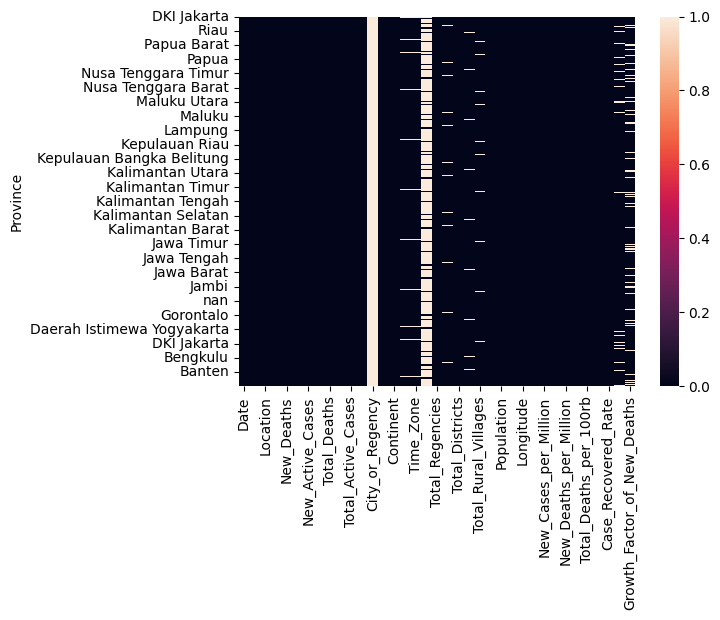

In [ ]:
sns.heatmap(df.isna())

In [ ]:
df = df[df["Date"] == ("2022-09-15")] #dipilih tanggal terakhir pada dataset
df = df[df.index.notnull()] #drop index yang terdapat missing value
df.head(10)

,Date,Location_ISO_Code,Location,New_Cases,New_Deaths,New_Recovered,New_Active_Cases,Total_Cases,Total_Deaths,Total_Recovered,...,Latitude,New_Cases_per_Million,Total_Cases_per_Million,New_Deaths_per_Million,Total_Deaths_per_Million,Total_Deaths_per_100rb,Case_Fatality_Rate,Case_Recovered_Rate,Growth_Factor_of_New_Cases,Growth_Factor_of_New_Deaths
Province,,,,,,,,,,,,,,,,,,,,,
Aceh,2022-09-15,ID-AC,Aceh,20,0,1,19,44038,2223,41713,...,4.225615,3.81,8392.58,0.00,423.65,42.36,5.05%,94.72%,2.50,1.0
Bali,2022-09-15,ID-BA,Bali,38,1,6,31,166831,4731,161629,...,-8.369472,9.01,39569.32,0.24,1122.11,112.21,2.84%,96.88%,6.33,NaN
Banten,2022-09-15,ID-BT,Banten,240,0,32,208,333875,2950,328482,...,-6.456736,22.38,31138.16,0.00,275.13,27.51,0.88%,98.38%,1.83,1.0
Bengkulu,2022-09-15,ID-BE,Bengkulu,4,0,0,4,29173,522,28617,...,-3.533584,2.00,14589.86,0.00,261.06,26.11,1.79%,98.09%,0.50,1.0
DKI Jakarta,2022-09-15,ID-JK,DKI Jakarta,1116,0,58,1058,1412511,15513,1386134,...,-6.204699,102.89,130231.62,0.00,1430.28,143.03,1.10%,98.13%,0.91,0.0
Daerah Istimewa Yogyakarta,2022-09-15,ID-YO,Daerah Istimewa Yogyakarta,27,0,0,27,224307,5928,217712,...,-7.894502,7.44,61775.29,0.00,1632.60,163.26,2.64%,97.06%,2.25,1.0
Jambi,2022-09-15,ID-JA,Jambi,8,0,0,8,38643,889,37681,...,-1.697698,2.29,11061.85,0.00,254.48,25.45,2.30%,97.51%,8.00,1.0
Jawa Barat,2022-09-15,ID-JB,Jawa Barat,492,0,79,413,1173731,15937,1144358,...,-6.920432,10.89,25989.74,0.00,352.89,35.29,1.36%,97.50%,2.58,1.0
Jawa Tengah,2022-09-15,ID-JT,Jawa Tengah,108,0,2,106,636409,33489,601517,...,-7.259097,2.97,17501.04,0.00,920.94,92.09,5.26%,94.52%,0.88,0.0


EDA

Langkah berikutnya adalah memilih Feature yang berkaitan dengan Covid.

* Total_Cases, Total_Deaths, Total_Recovered dipilih karena merepresentasikan kumulatif dari semua kasus covid.

* Population, Population_Density dipilih karena Populasi dan kepadatan populasi berbanding lurus dengan persebaran kasus Covid.

* Total_Cases_per_Million, Total_Deaths_per_Million dipilih karena merepresentasikan Kasus dan Kematian per populasi.

* Case_Fatality_Rate, Case_Recovered_Rate dipilih karena merepresentasikan mortalitas kasus covid.

* Active_Cases,
 Jumlah kasus yang masih aktif di suatu wilayah.

Feature Enginnering

In [ ]:
df = df[['Total_Cases','Total_Deaths','Total_Recovered','Population_Density',
        'Population','Total_Cases_per_Million','Total_Deaths_per_Million']] #Membuat dataframe baru dengan feature yang dipilih
df

,Total_Cases,Total_Deaths,Total_Recovered,Population_Density,Population,Total_Cases_per_Million,Total_Deaths_per_Million
Province,,,,,,,
Aceh,44038,2223,41713,90.54,5247257,8392.58,423.65
Bali,166831,4731,161629,729.43,4216171,39569.32,1122.11
Banten,333875,2950,328482,1109.64,10722374,31138.16,275.13
Bengkulu,29173,522,28617,100.38,1999539,14589.86,261.06
DKI Jakarta,1412511,15513,1386134,16334.31,10846145,130231.62,1430.28
Daerah Istimewa Yogyakarta,224307,5928,217712,1158.90,3631015,61775.29,1632.60
Jambi,38643,889,37681,69.79,3493357,11061.85,254.48
Jawa Barat,1173731,15937,1144358,1276.55,45161325,25989.74,352.89
Jawa Tengah,636409,33489,601517,1108.64,36364072,17501.04,920.94


In [ ]:
#Menambah kolom feature Fatality Rate dan Recovery Rate
df["Fatality_Rate"] = df.Total_Deaths / df.Total_Cases
df["Recovery_Rate"] = df.Total_Recovered / df.Total_Cases
df.head()

,Total_Cases,Total_Deaths,Total_Recovered,Population_Density,Population,Total_Cases_per_Million,Total_Deaths_per_Million,Fatality_Rate,Recovery_Rate
Province,,,,,,,,,
Aceh,44038,2223,41713,90.54,5247257,8392.58,423.65,0.050479,0.947205
Bali,166831,4731,161629,729.43,4216171,39569.32,1122.11,0.028358,0.968819
Banten,333875,2950,328482,1109.64,10722374,31138.16,275.13,0.008836,0.983847
Bengkulu,29173,522,28617,100.38,1999539,14589.86,261.06,0.017893,0.980941
DKI Jakarta,1412511,15513,1386134,16334.31,10846145,130231.62,1430.28,0.010983,0.981326


<Axes: >

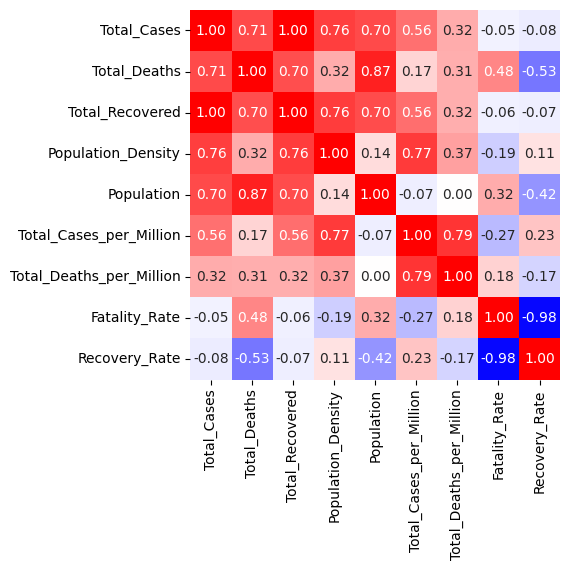

In [ ]:
sns.heatmap(df.corr(),cmap="bwr",cbar=False,vmin=-1,vmax=1,annot=True,square=True, fmt =".2f")

Scaling

Salah satu manfaat scaling adalah kemampuan untuk mengontrol variabilitas dataset. Ini sangat bermanfaat untuk menghitung jarak antara data dalam clustering KMean. Algoritma yang paling sederhana adalah MinMaxScaling.




In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Scaling dataset dengan MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df),columns= df.columns)
scaled_df

,Total_Cases,Total_Deaths,Total_Recovered,Population_Density,Population,Total_Cases_per_Million,Total_Deaths_per_Million,Fatality_Rate,Recovery_Rate
0,0.021062,0.058083,0.020021,0.005020,0.103315,0.012281,0.193480,0.893271,0.133663
1,0.108902,0.133639,0.107430,0.044154,0.080151,0.265023,0.659439,0.418764,0.644682
2,0.228397,0.079984,0.229053,0.067443,0.226316,0.196674,0.094398,0.000000,1.000000
3,0.010428,0.006839,0.010475,0.005622,0.030354,0.062521,0.085012,0.194290,0.931294
4,1.000000,0.458456,1.000000,1.000000,0.229096,1.000000,0.865027,0.046053,0.940394
5,0.150018,0.169699,0.148310,0.070460,0.067005,0.445041,1.000000,0.377365,0.686757
6,0.017203,0.017895,0.017082,0.003749,0.063913,0.033920,0.080622,0.303949,0.793318
7,0.829189,0.471230,0.823764,0.077666,1.000000,0.154937,0.146274,0.101727,0.790226
8,0.444815,1.000000,0.428075,0.067381,0.802366,0.086121,0.525234,0.939233,0.085642
9,0.419875,0.948033,0.404374,0.051342,0.894810,0.064716,0.434345,0.943141,0.102878


  PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 3,random_state = 42)
pca_data= pd.DataFrame(pca.fit_transform(scaled_df), columns=(["PC1","PC2", "PC3"]))
pca_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,32.0,-3.122502e-17,0.491700,-0.475742,-0.335344,-0.153785,0.106124,1.292272
PC2,32.0,-1.387779e-17,0.407008,-0.854254,-0.113292,0.022829,0.153741,1.423759
PC3,32.0,-3.122502e-17,0.316095,-0.897468,-0.203055,-0.081340,0.143035,0.623915


In [ ]:
import plotly.express as px
x =pca_data["PC1"]
y =pca_data["PC2"]
z =pca_data["PC3"]
fig = px.scatter_3d(pca_data, x, y, z,color=df.index)
fig.show()

Modelling/Clustering

Salah satu kekurangan Algoritma Clustering Kmeans adalah bahwa kita perlu mengetahui berapa banyak cluster yang ingin kita miliki. Oleh karena itu, ada metode yang cukup terkenal untuk menemukan jumlah cluster yang ideal: Metode Elbow. Metode ini diperoleh dengan membuat grafik antara jumlah cluster dan skor WCSS (atau jumlah kuadrat dalam cluster).





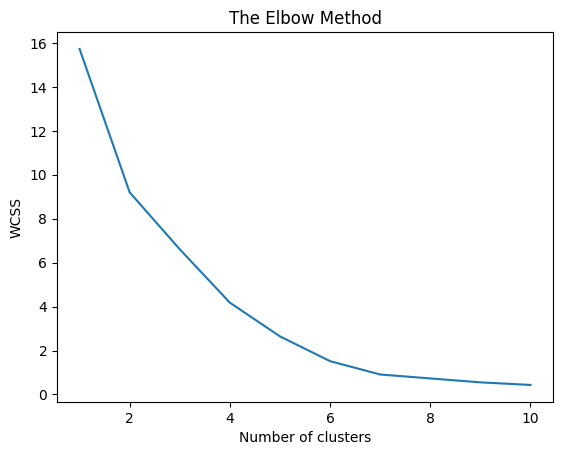

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i,
    init = 'k-means++', max_iter= 300, n_init= 10)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

Jumlah cluster yang optimum dapat ditentukan dengan mencari "Elbow" atau Siku pada graph. Pada kasus ini, dipilih jumlah cluster k = 5.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5,random_state=42)

labels = kmeans.fit_predict(pca_data)
np.unique(labels)

#n_clusters merupakan Jumlah cluster yang dipilih
#dan random_state digunakan untuk mengontrol ke-random-an saat rerun kernel.

array([0, 1, 2, 3, 4], dtype=int32)

In [ ]:
x =pca_data["PC1"]
y =pca_data["PC2"]
z =pca_data["PC3"]
fig = px.scatter_3d(pca_data, x, y, z,color=labels)
fig.show()

Visualisasi dan Komparasi Cluster

In [ ]:
#append column cluster pada dataframe awal
df["Clusters"] = labels

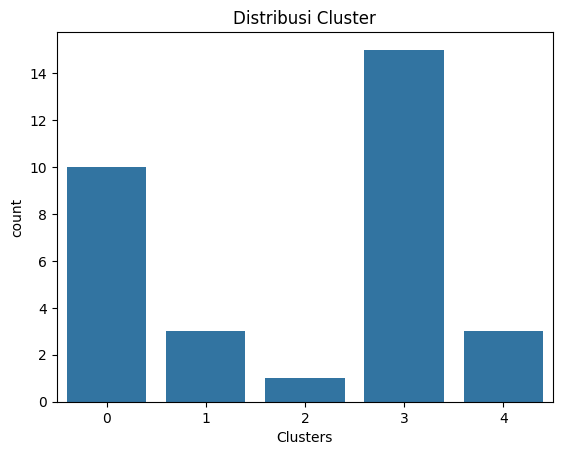

In [ ]:
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribusi Cluster")
plt.show()

In [ ]:
# Anggota Cluster
Cluster1 = df[df['Clusters']==0]
Cluster2 = df[df['Clusters']==1]
Cluster3 = df[df['Clusters']==2]
Cluster4 = df[df['Clusters']==3]
Cluster5 = df[df['Clusters']==4]

In [ ]:
list(Cluster1.index)

['Bali',
 'Daerah Istimewa Yogyakarta',
 'Kalimantan Selatan',
 'Kalimantan Tengah',
 'Kalimantan Timur',
 'Kalimantan Utara',
 'Kepulauan Bangka Belitung',
 'Kepulauan Riau',
 'Riau',
 'Sulawesi Tengah']

In [ ]:
list(Cluster2.index)

['Jawa Barat', 'Jawa Tengah', 'Jawa Timur']

In [ ]:
list(Cluster3.index)

['DKI Jakarta']

In [ ]:
list(Cluster4.index)

['Banten',
 'Bengkulu',
 'Jambi',
 'Kalimantan Barat',
 'Maluku',
 'Maluku Utara',
 'Nusa Tenggara Barat',
 'Nusa Tenggara Timur',
 'Papua',
 'Papua Barat',
 'Sulawesi Selatan',
 'Sulawesi Tenggara',
 'Sulawesi Utara',
 'Sumatera Barat',
 'Sumatera Utara']

In [ ]:
list(Cluster5.index)

['Aceh', 'Lampung', 'Sumatera Selatan']

Karakteristik Kluster

In [ ]:
df_mean = pd.concat([pd.DataFrame(df.mean().drop('Clusters'), columns=['mean']),
                   df.groupby('Clusters').mean().T], axis=1)
df_dev_rel = df_mean.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
df_dev_rel.drop(columns=['mean'], inplace=True)
df_mean.drop(columns=['mean'], inplace=True)

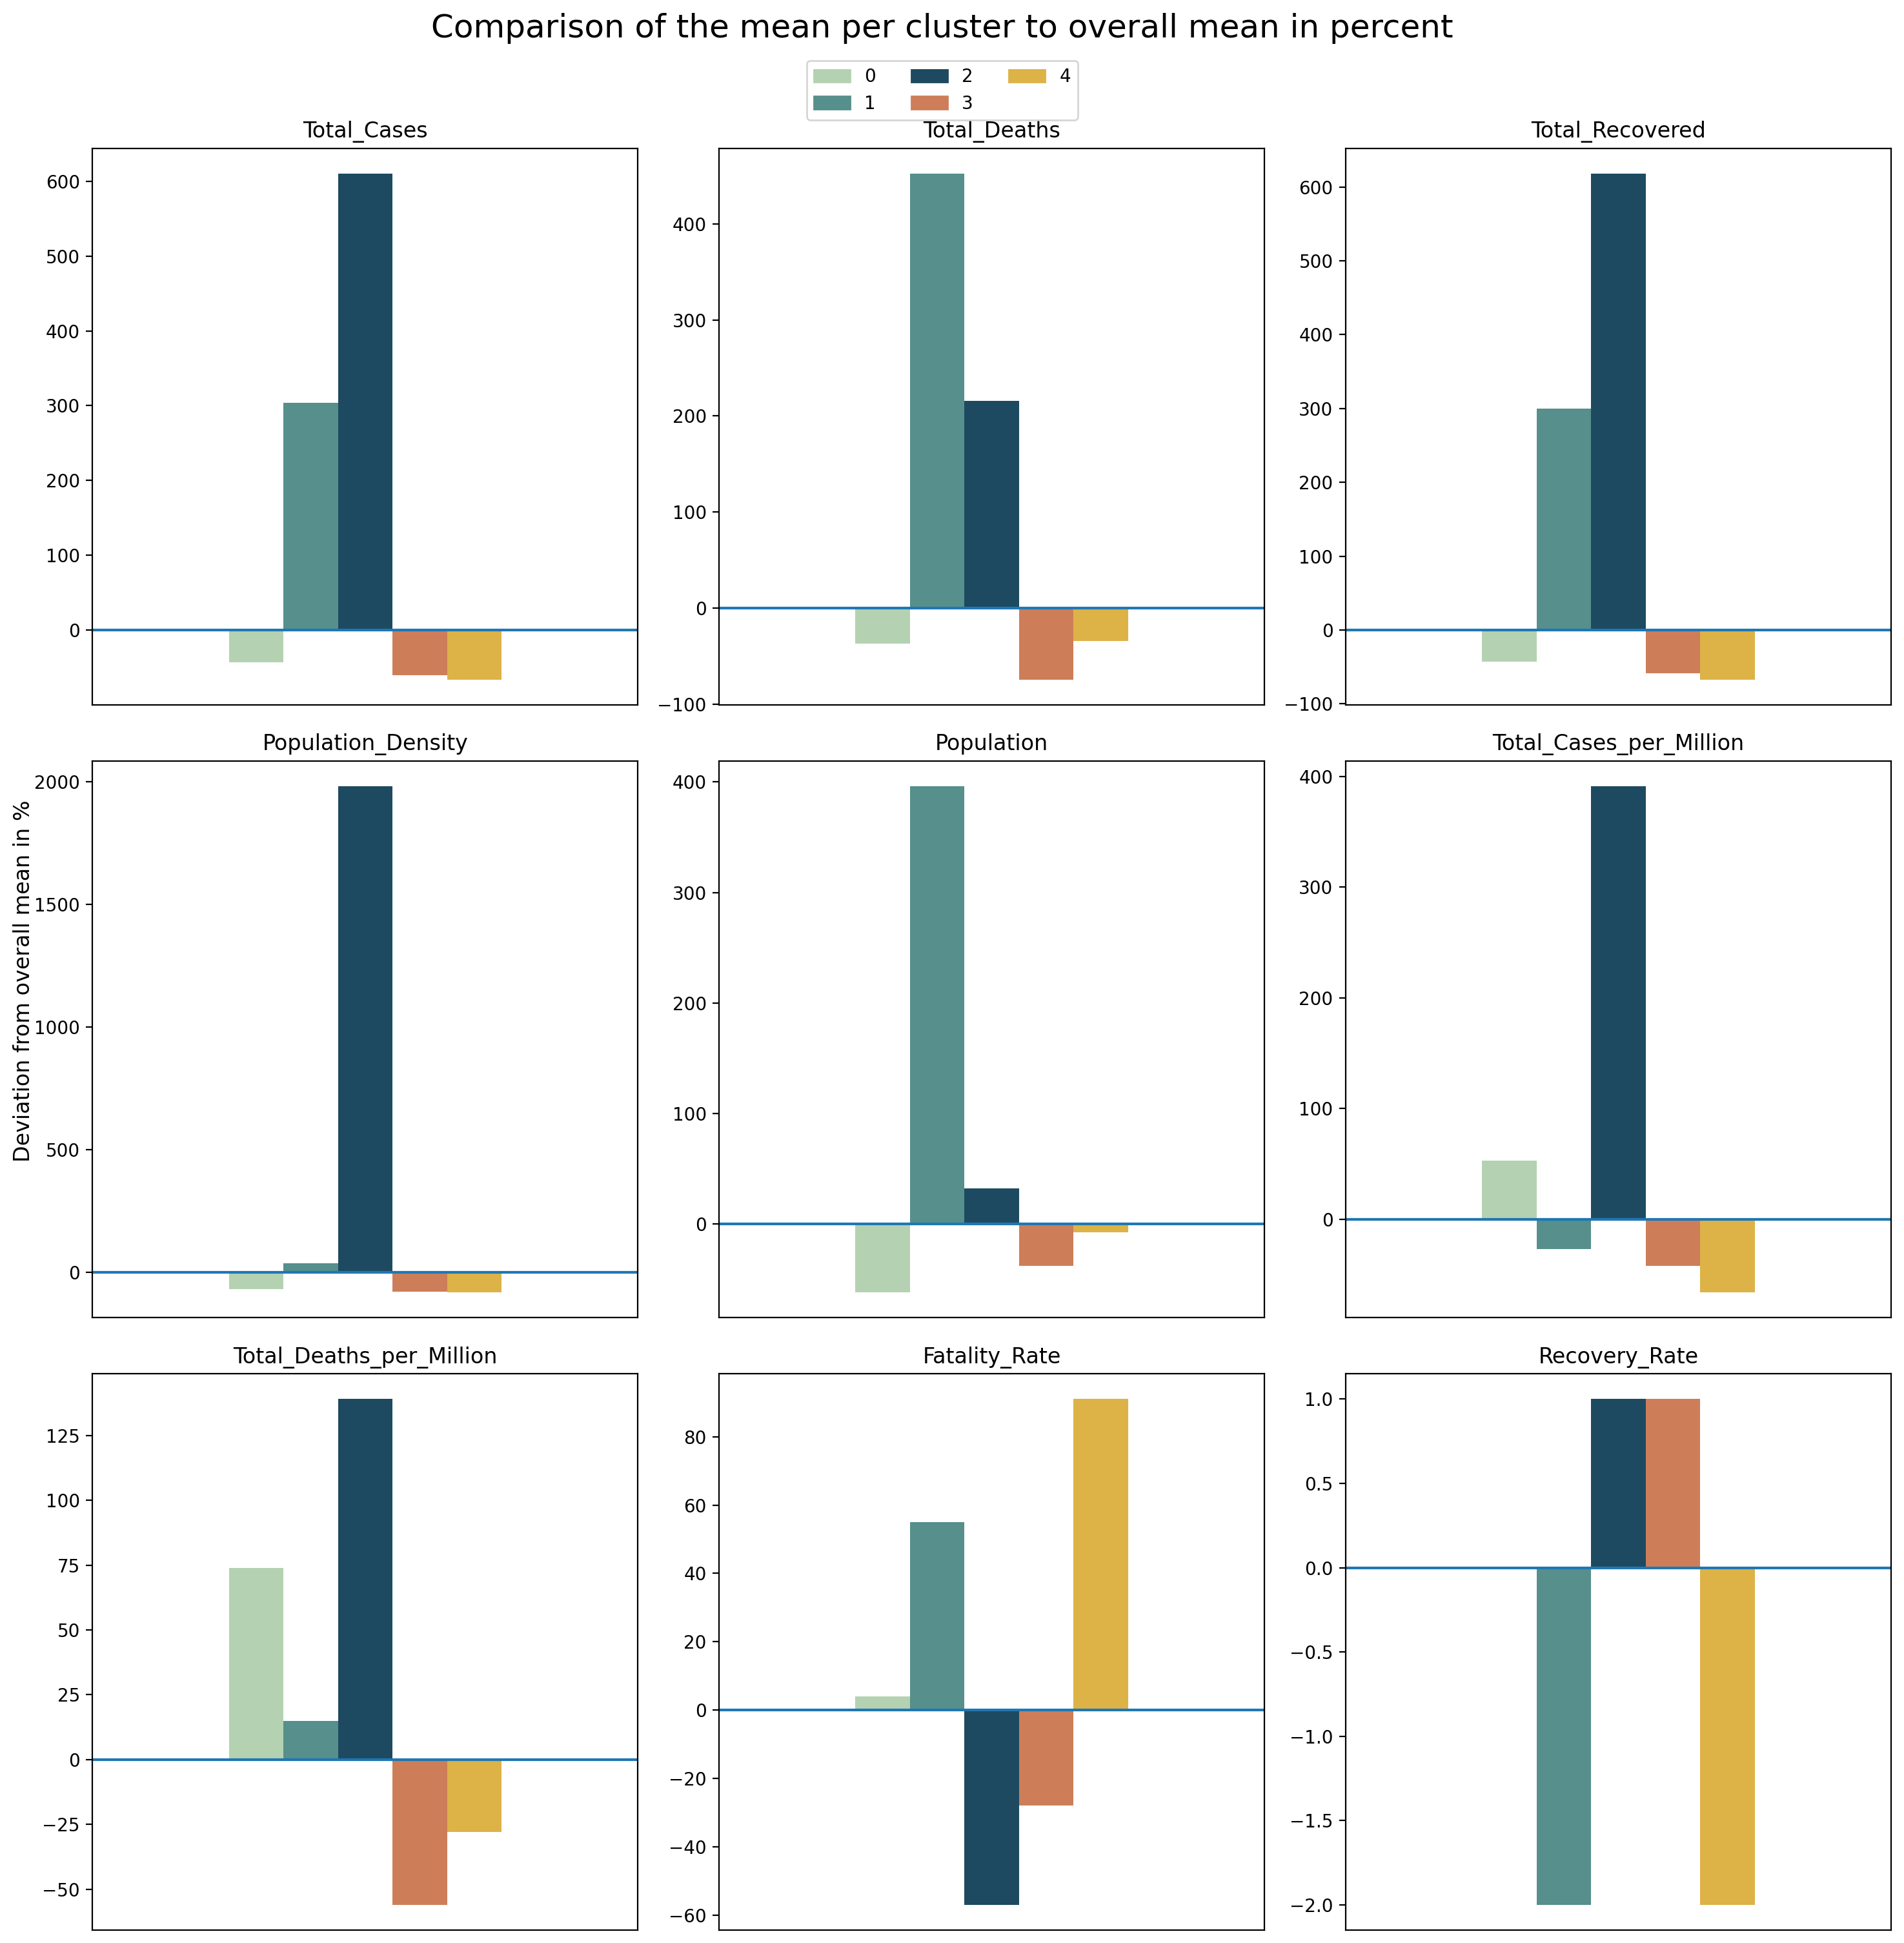

In [ ]:
cluster_colors = ['#b4d2b1', '#568f8b', '#1d4a60', '#cd7e59', '#ddb247', '#d15252']
import matplotlib.patches as mpatches

def cluster_comparison_bar(df_comparison, colors, deviation=True, title="Cluster results"):
    features = df_comparison.index
    ncols = 3
    nrows = len(features) // ncols + (len(features) % ncols > 0)
    fig = plt.figure(figsize=(15, 15), dpi=200)

    for n, feature in enumerate(features):
        # create chart
        ax = plt.subplot(nrows, ncols, n + 1)
        df_comparison[df_comparison.index == feature].plot(
            kind='bar', ax=ax, title=feature,
            color=colors[0:df.Clusters.nunique()],
            legend=False
        )
        plt.axhline(y=0)
        x_axis = ax.axes.get_xaxis()
        x_axis.set_visible(False)

    c_labels = df_comparison.columns.to_list()
    c_colors = colors[0:3]
    mpats = [mpatches.Patch(color=c, label=l) for c, l in zip(colors[0:df.Clusters.nunique()],
                                                                df_comparison.columns.to_list())]
    fig.legend(handles=mpats,
               ncol=ncols,
               loc="upper center",
               fancybox=True,
               bbox_to_anchor=(0.5, 0.98)
              )

    axes = fig.get_axes()
    fig.suptitle(title, fontsize=18, y=1)
    fig.supylabel('Deviation from overall mean in %')
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.show()

cluster_comparison_bar(df_dev_rel, cluster_colors, title="Comparison of the mean per cluster to overall mean in percent")


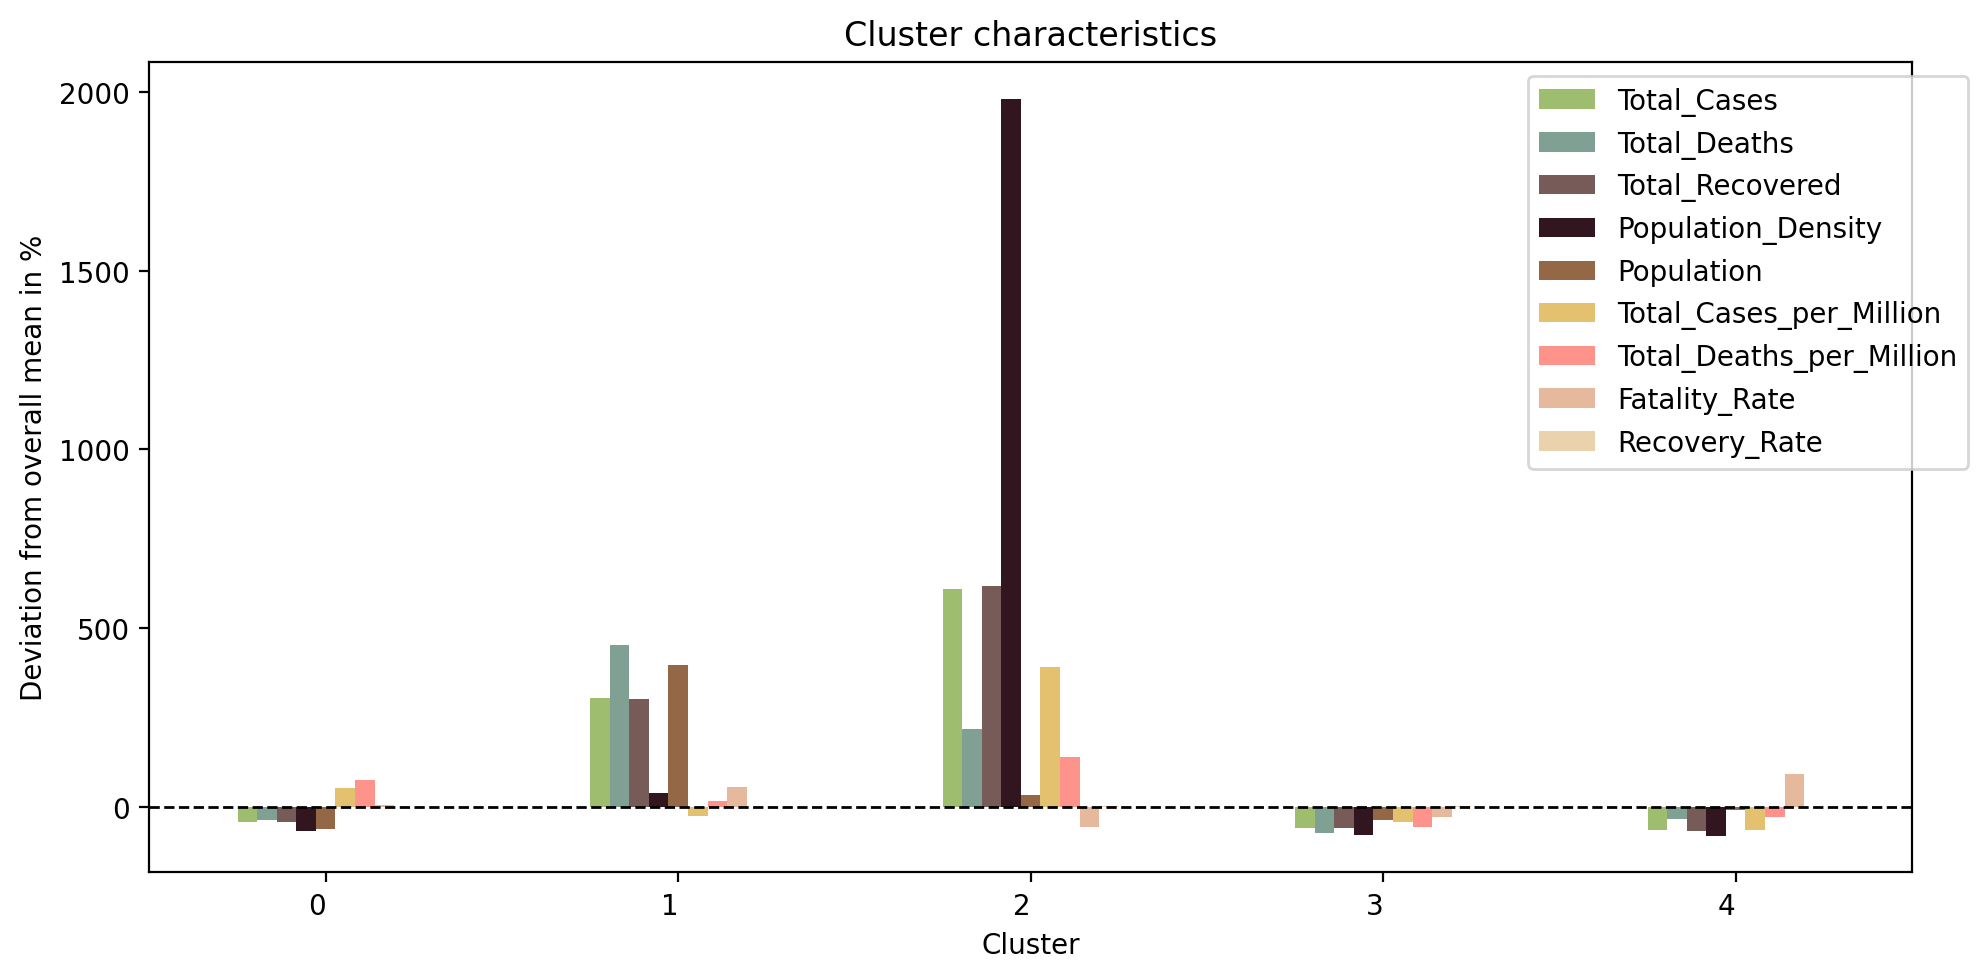

In [ ]:
colors = ['#9EBD6E','#81a094','#775b59','#32161f', '#946846', '#E3C16F', '#fe938c', '#E6B89C','#EAD2AC',
          '#DE9E36', '#4281A4','#37323E','#95818D'
         ]

fig = plt.figure(figsize=(10,5), dpi=200)
df_dev_rel.T.plot(kind='bar',
                       ax=fig.add_subplot(),
                       title="Cluster characteristics",
                       color=colors,
                       xlabel="Cluster",
                       ylabel="Deviation from overall mean in %"
                      )
plt.axhline(y=0, linewidth=1, ls='--', color='black')
plt.legend(bbox_to_anchor=(1.04,1))
fig.autofmt_xdate(rotation=0)
plt.tight_layout()
plt.show()

<Axes: >

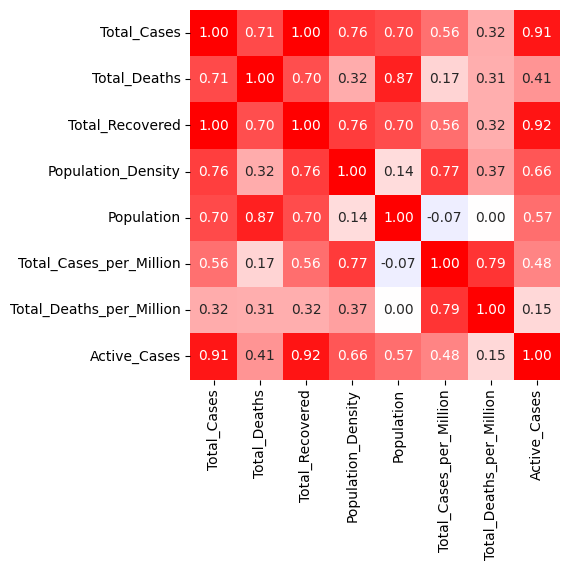

In [ ]:
df["Active_Cases"] = df["Total_Cases"] - df["Total_Deaths"] - df["Total_Recovered"]  # Menambah kolom Active_Cases

# Memilih fitur yang baru
df = df[['Total_Cases', 'Total_Deaths', 'Total_Recovered', 'Population_Density',
         'Population', 'Total_Cases_per_Million', 'Total_Deaths_per_Million', 'Active_Cases']]

# Menampilkan heatmap korelasi
sns.heatmap(df.corr(), cmap="bwr", cbar=False, vmin=-1, vmax=1, annot=True, square=True, fmt=".2f")



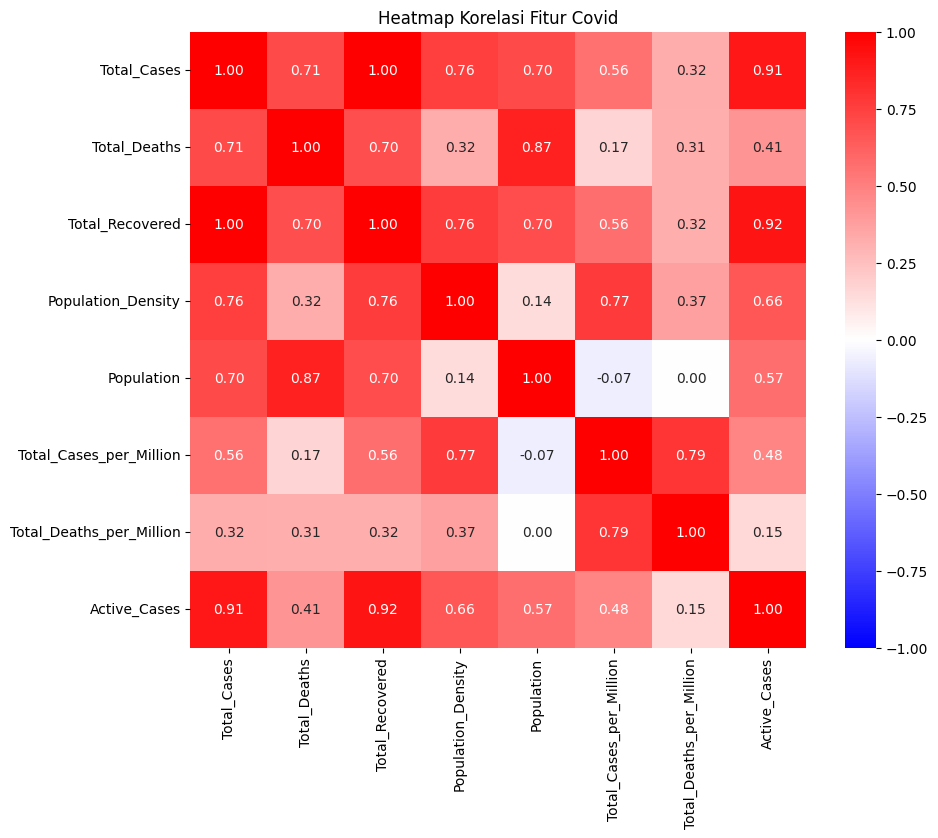

In [ ]:
# Membuat heatmap korelasi
plt.figure(figsize=(10, 8))  # Ukuran figure bisa disesuaikan
sns.heatmap(df.corr(), cmap="bwr", cbar=True, annot=True, square=True, fmt=".2f", vmin=-1, vmax=1)

# Menambahkan judul
plt.title('Heatmap Korelasi Fitur Covid')

# Menampilkan plot
plt.show()